1.<b>Problem Statement</b><br>
<br>
What is the average price of each distinct brand listed?<br>
Which brands have the highest prices?<br>
Which ones have the widest distribution of prices?<br>
Correlate specific product features with changes in price.<br>

2.<b>Data Cleaning</b><br>
<ol>Exploratory analysis</ol>
<ol>Compute most important features</ol>

6.<b>Conclusion</b>

In [355]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [356]:
data = pd.read_csv('/Users/mac/Downloads/Datafiniti_Womens_Shoes_Jun19.csv', header='infer',na_values='unknown',sep=',')

In [357]:
pd.set_option('display.max_columns',999)

In [358]:
data.shape

(10000, 32)

<b>Data Cleaning</b>

In [359]:
data.columns

Index(['id', 'dateAdded', 'dateUpdated', 'asins', 'brand', 'categories',
       'primaryCategories', 'colors', 'dimension', 'ean / upc', 'imageURLs',
       'keys', 'manufacturer', 'manufacturerNumber', 'name',
       'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.color', 'prices.condition', 'prices.currency',
       'prices.dateAdded', 'prices.dateSeen', 'prices.isSale',
       'prices.merchant', 'prices.offer', 'prices.returnPolicy',
       'prices.shipping', 'prices.size', 'prices.sourceURLs', 'sizes',
       'sourceURLs'],
      dtype='object')

In [360]:
featured = ['brand','categories','colors','name','prices.amountMax','prices.currency','sizes','prices.size']
data = data[featured]

In [361]:
data.head(3)

,brand,categories,colors,name,prices.amountMax,prices.currency,sizes,prices.size
0,City Classified,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Black,City Classified Stylish-S Women's Zipper Ankle...,29.95,USD,8,8
1,Skechers,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Taupe,"Skechers Women'S You Radiate, Walking",84.00,USD,6 M US,6 M US
2,Floral,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Black,FLORAL Pearl Women's Wide Width Evening Dress ...,49.95,USD,5,5


In [362]:
#Checking for unique data length 
unique_data = [(col, len(data[col].unique())) for col in data.columns]
unique_data = pd.DataFrame(unique_data, columns=['column', 'unique_len'])
unique_data.sort_values('unique_len')

,column,unique_len
5,prices.currency,1
1,categories,57
7,prices.size,467
6,sizes,494
0,brand,505
2,colors,1910
4,prices.amountMax,2242
3,name,2830


In [363]:
#Adding names to categories  
data.loc[data['name'] == 'MUK LUKS Womens Jane Suede Moccasin', 'categories'] = "Loafers"
data.loc[data['name'].str.contains('Boot|Bootie|Boots|Booties'), 'categories'] = 'Boots'
data.loc[data['name'].str.contains('Sandals|Sandal'), 'categories'] = 'Sandals'
data.loc[data['name'].str.contains('Athletic|Canvas|Walk|Walking|New Balance'), 'categories'] = 'Sports Shoes'
data.loc[data['name'].str.contains('Pumps'), 'categories'] = 'Pumps'
data.loc[data['name'].str.contains('Flat|Flats'), 'categories'] = 'Flats'
data.loc[data['name'].str.contains('Clog'), 'categories'] = 'Clogs'
data.loc[data['name'].str.contains('Bear Paw Plush'), 'categories'] = 'Home Shoes'

In [364]:
data.categories.nunique()

37

In [365]:
data['prices'] = data['prices.amountMax']

In [366]:
#Dropping redundant columns 
data.drop(['prices.currency','prices.size','prices.amountMax'], axis=1, inplace=True)

In [367]:
data.head(2)

,brand,categories,colors,name,sizes,prices
0,City Classified,Boots,Black,City Classified Stylish-S Women's Zipper Ankle...,8,29.95
1,Skechers,Sports Shoes,Taupe,"Skechers Women'S You Radiate, Walking",6 M US,84.00


In [368]:
#Remove string characters in sizes column 
data['sizes'] = data.sizes.str.extract('(\d+)')
data.head(2)

,brand,categories,colors,name,sizes,prices
0,City Classified,Boots,Black,City Classified Stylish-S Women's Zipper Ankle...,8,29.95
1,Skechers,Sports Shoes,Taupe,"Skechers Women'S You Radiate, Walking",6,84.00


In [369]:
#Setting target variable
data.target_name = 'prices'

In [370]:
#Check for missing values 
data.isna().sum()

brand          0
categories     0
colors         0
name           0
sizes         27
prices         0
dtype: int64

In [371]:
data.sizes.fillna('median', inplace=True)

In [372]:
data.head(2)

,brand,categories,colors,name,sizes,prices
0,City Classified,Boots,Black,City Classified Stylish-S Women's Zipper Ankle...,8,29.95
1,Skechers,Sports Shoes,Taupe,"Skechers Women'S You Radiate, Walking",6,84.00


In [373]:
train = data[0:7000]
test = data[7000:]
test.to_csv('shoetest.csv')

In [374]:
data = train
data.shape

(7000, 6)

In [375]:
#checking categorical variables 
data.describe(include='object')

,brand,categories,colors,name,sizes
count,7000,7000,7000,7000,7000
unique,457,8,1554,2350,31
top,Trotters,Boots,Black,Women's Drew Joy,8
freq,433,2301,791,124,1229


In [376]:
#Details of the numerical
data.describe()

,prices
count,7000.000000
mean,74.791429
std,193.402962
min,6.500000
25%,37.085000
50%,54.950000
75%,87.950000
max,5000.000000


<b>Exploratory Analysis</b>

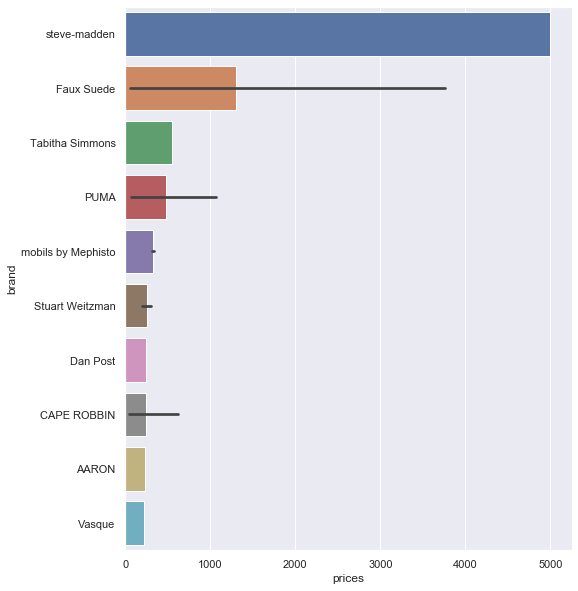

In [377]:
top10 = list(data.groupby('brand')['prices'].mean().sort_values(ascending=False).head(10).index)
# subset dataframe with only those top10 brands.
df10 = data.loc[data['brand'].isin(top10)]
plt.figure(figsize=(8,10))
sns.barplot(y='brand', x='prices', data=df10, order=top10)

<b>Intuition</b><br>
Top 10 most expensive brands

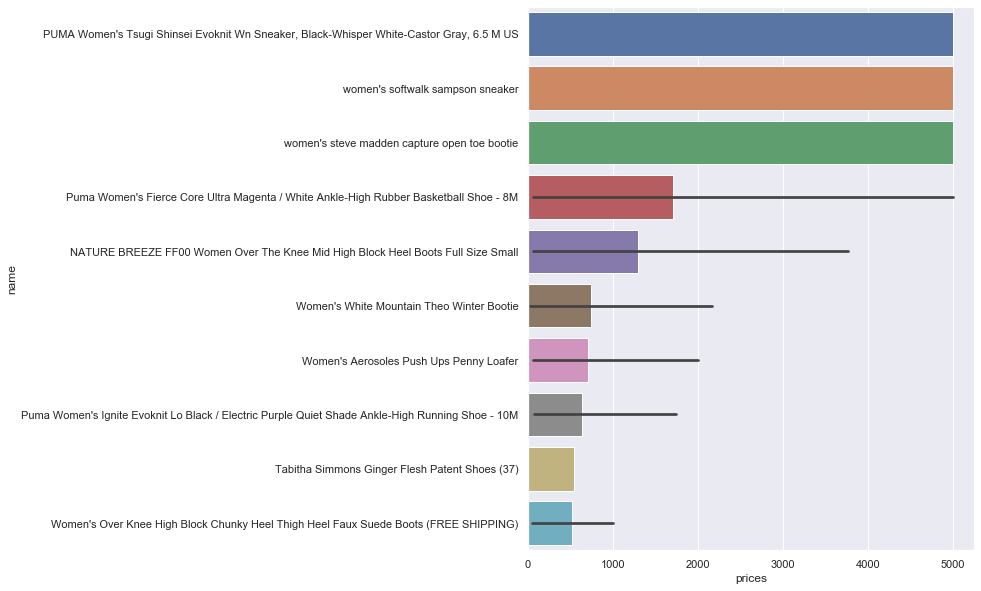

In [378]:
top10 = list(data.groupby('name')['prices'].mean().sort_values(ascending=False).head(10).index)
df10 = data.loc[data['name'].isin(top10)]
plt.figure(figsize=(8,10))
sns.barplot(y='name', x='prices', data=df10, order=top10)

<b>Intuition</b><br>
Top most expensive products 

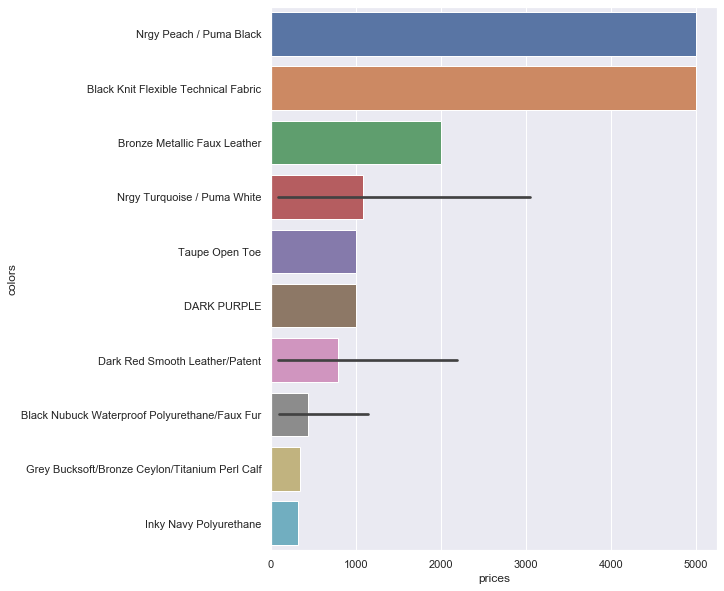

In [379]:
top10 = list(data.groupby('colors')['prices'].mean().sort_values(ascending=False).head(10).index)
df10 = data.loc[data['colors'].isin(top10)]
plt.figure(figsize=(8,10))
sns.barplot(y='colors', x='prices', data=df10, order=top10)

<b>Intuition</b><br>
Top most expensive colors 

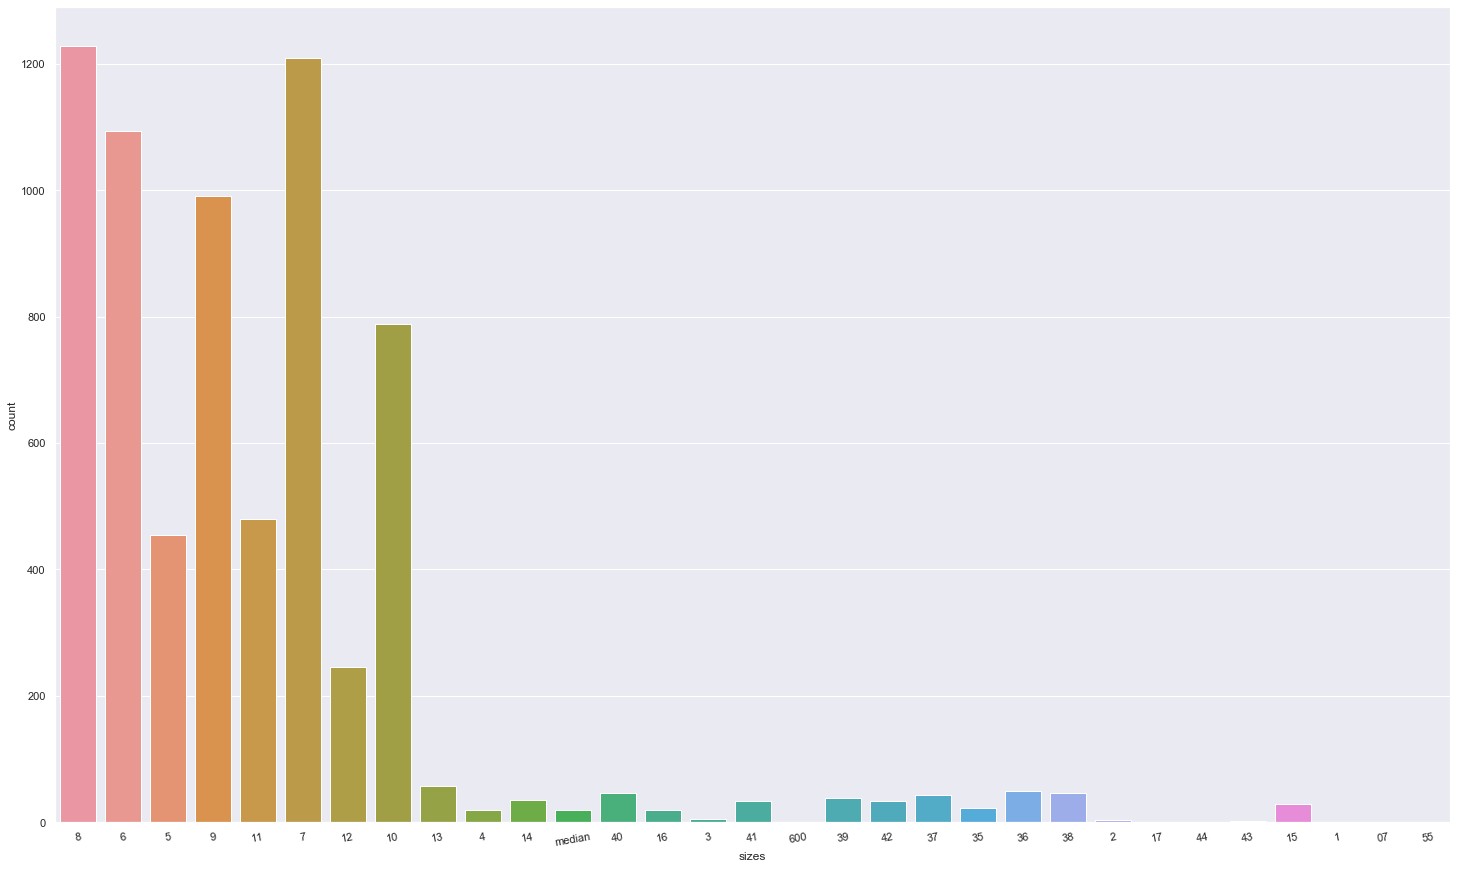

In [380]:
#Graph Plot to display Shoe brands from data set
plt.figure(figsize=(25,15))
p = sns.countplot(data['sizes'])
p1 = plt.setp(p.get_xticklabels(), rotation=10)

In [381]:
#Result of average price of each distinct category listed 
meanprice=data.groupby('categories')['prices'].mean().sort_values(ascending=False)
meanprice

categories
Clogs                                           89.830769
Womens Shoes,Clothing,All Womens Shoes,Shoes    89.612770
Clothing,Shoes,Womens Shoes,All Womens Shoes    80.792188
Sports Shoes                                    80.717853
Boots                                           72.223668
Sandals                                         64.858532
Flats                                           55.879478
Pumps                                           51.637273
Name: prices, dtype: float64

Text(0.5, 1.0, 'Average Price of Categories')

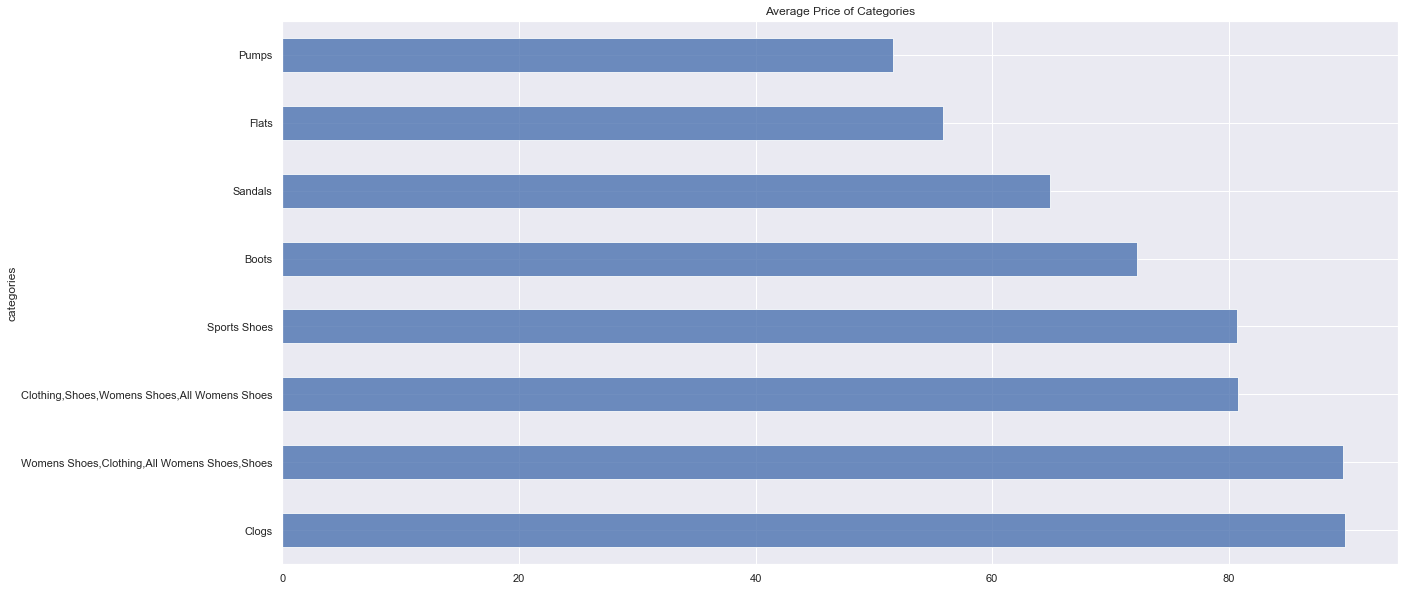

In [382]:
fig = plt.figure(figsize=(20,10))
meanprice.plot(kind='barh', align='center', alpha=.8)
plt.title('Average Price of Categories')

<b>Analysis of shoes by Color</b>

In [383]:
data.colors.value_counts().head(5)

Black    791
White    427
Brown    144
Grey     120
Taupe    114
Name: colors, dtype: int64

<b>Which brands have the the most shoe colors</b>

In [384]:
Black= data[data.colors =="Black"]
Grey= data[data.colors =="Gray"]
Taupe= data[data.colors =="Taupe"]
Navy= data[data.colors =="Navy"]
Brown=data[data.colors =="Brown"]

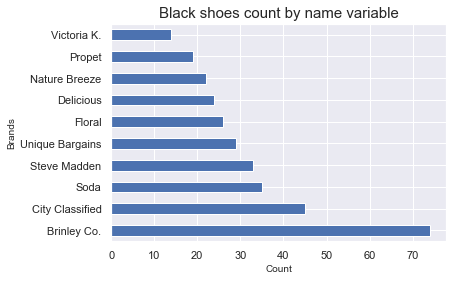

In [385]:
# Black shoes 

Black['brand'].value_counts()[:10].plot(kind='barh')
plt.title('Black shoes count by brand variable', fontsize = 15)
plt.xlabel('Count', fontsize = 10)
plt.ylabel('Brands', fontsize = 10)
plt.show()

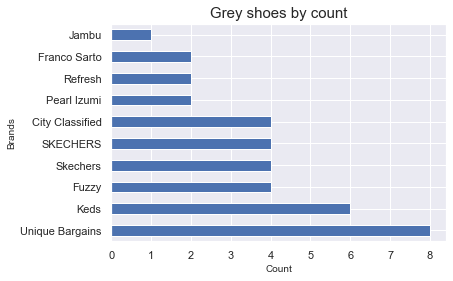

In [386]:
# Grey shoes 

Grey['brand'].value_counts()[:10].plot(kind='barh')
plt.title('Grey shoes by count', fontsize = 15)
plt.xlabel('Count', fontsize = 10)
plt.ylabel('Brands', fontsize = 10)
plt.show()

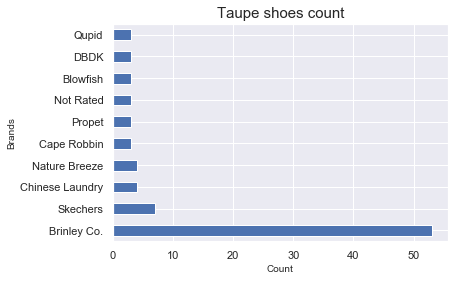

In [387]:
# Taupe Shoes

Taupe['brand'].value_counts()[:10].plot(kind='barh', align='center')
plt.title('Taupe shoes count', fontsize = 15)
plt.xlabel('Count', fontsize = 10)
plt.ylabel('Brands', fontsize = 10)
plt.show()

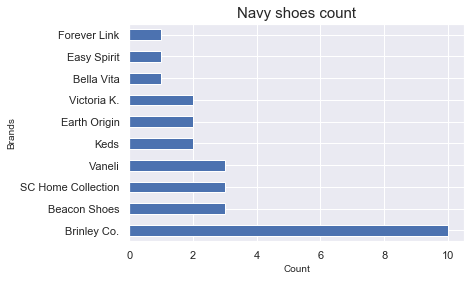

In [388]:
# Navy Shoes

Navy['brand'].value_counts()[:10].plot(kind='barh')
plt.title('Navy shoes count', fontsize = 15)
plt.xlabel('Count', fontsize = 10)
plt.ylabel('Brands', fontsize = 10)
plt.show()

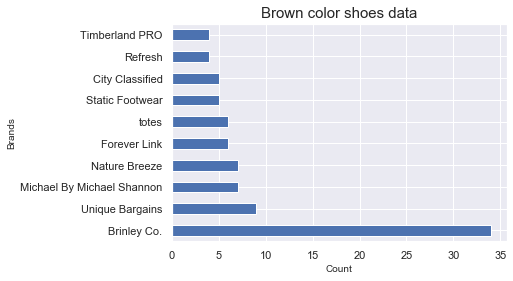

In [389]:
#Brown shoes 

Brown['brand'].value_counts()[:10].plot(kind='barh')
plt.title('Brown color shoes data', fontsize = 15)
plt.xlabel('Count', fontsize = 10)
plt.ylabel('Brands', fontsize = 10)
plt.show()

<b>Most expensive brands</b>

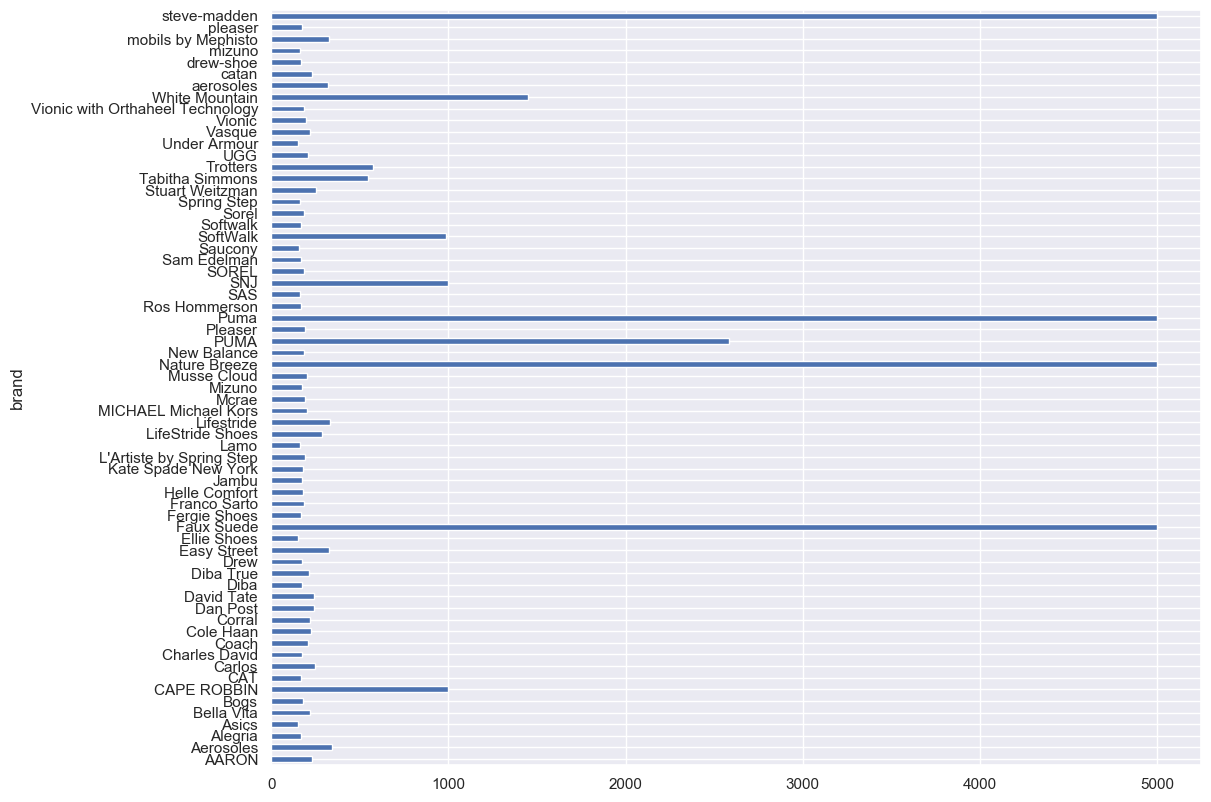

In [390]:
rank = data.sort_values(by='prices', ascending=False).head(350).tail(350)
plt.figure(figsize=(12,10), dpi=100, facecolor='w', edgecolor='k')
rank.groupby('brand')['prices'].mean().plot(kind='barh')

<b>Model Process</b>

In [391]:
data.head(2)

,brand,categories,colors,name,sizes,prices
0,City Classified,Boots,Black,City Classified Stylish-S Women's Zipper Ankle...,8,29.95
1,Skechers,Sports Shoes,Taupe,"Skechers Women'S You Radiate, Walking",6,84.00


In [392]:
from sklearn.preprocessing import LabelEncoder

In [393]:
data['brand'] = LabelEncoder().fit_transform(data['brand'])
data['categories'] = LabelEncoder().fit_transform(data['categories'])
data['colors'] = LabelEncoder().fit_transform(data['colors'])
data['name'] = LabelEncoder().fit_transform(data['name'])
data['sizes'] = LabelEncoder().fit_transform(data['sizes'])

In [394]:
data.head(2)

,brand,categories,colors,name,sizes,prices
0,101,0,61,357,28,29.95
1,335,6,1388,1218,25,84.00


In [395]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [396]:
data['prices']=data.prices.astype('int64')

In [397]:
y = data['prices']
X = data.drop(['prices'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=124)

In [398]:
from sklearn.preprocessing import MinMaxScaler

In [400]:
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)

In [401]:
X_test = minmax.transform(X_test)

In [402]:
X_train.shape

(4900, 5)

In [403]:
X_test.shape

(2100, 5)

In [405]:
y.shape

(7000,)

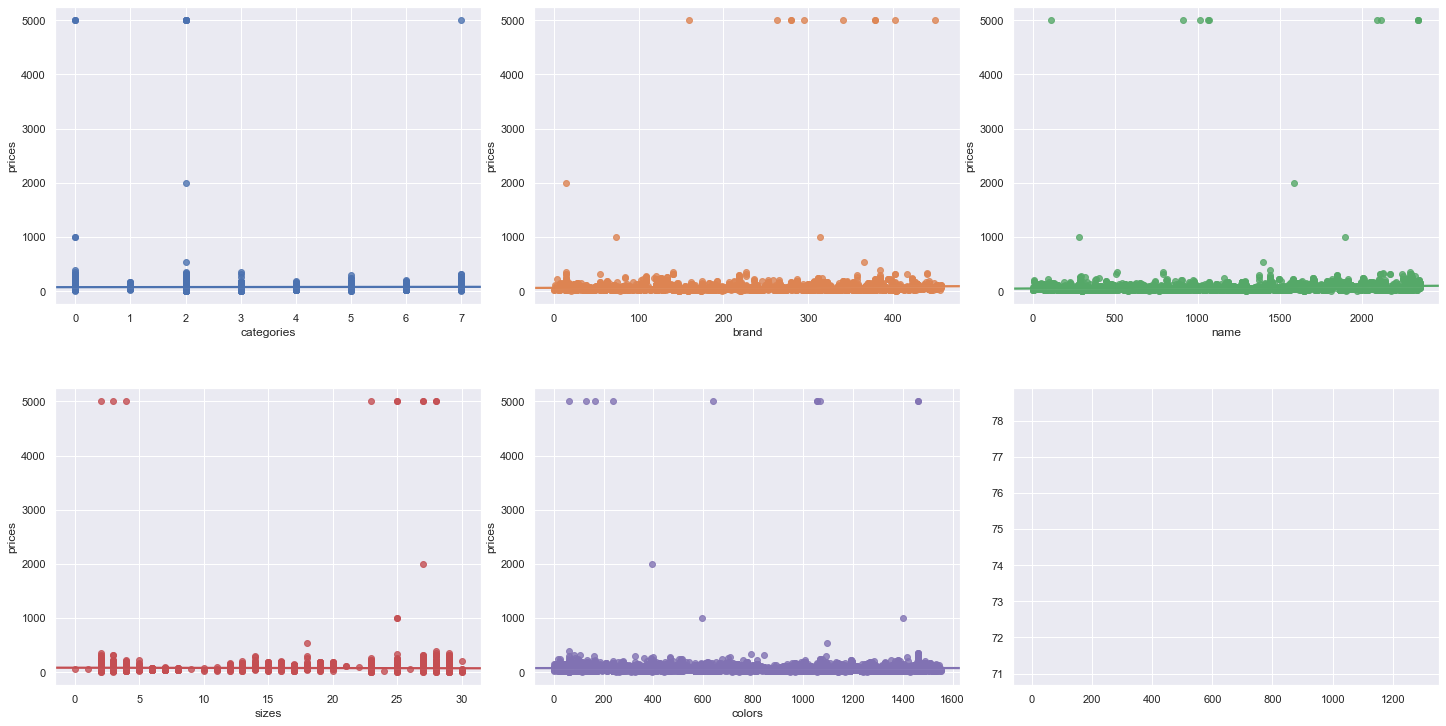

In [353]:
from sklearn import preprocessing
column_sels = ['categories', 'brand', 'name', 'sizes', 'colors']
X = data.loc[:,column_sels]
y = data['prices']
x = pd.DataFrame(data=x, columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

[0.197022   0.06245959 0.23153581 0.34314332 0.16583927]


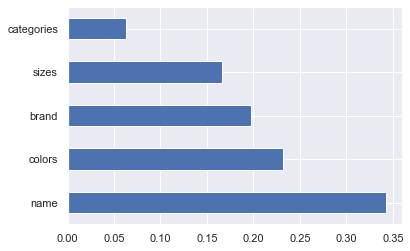

In [304]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<b>Conclusions</b><br>

1.Steve-Madden, Faux Suede and Tabitha Simmons are the top 3 most expensive brands <br>
2.PUMA women's Tsugi Shinsei and Women's softwalk sampson sneaker are the most expensive items in the catalog<br>
3.PUMA black and bronze metallic Faux Leather are the most expensive shoe colors in the market <br>
4.Size 6,7 and 8 are the most commonly available shoe sizes in the market <br>
5.Clogs, sport shoes and boots are the most expensive shoes in the market <br>
6.As expected, the name, color and brand  are the most influential features on the price
